In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 불러오기
df = pd.read_csv("xAPI-Edu-Data.csv")
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [3]:
# 결측치 확인
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

## EDA(학업 환경 정보)

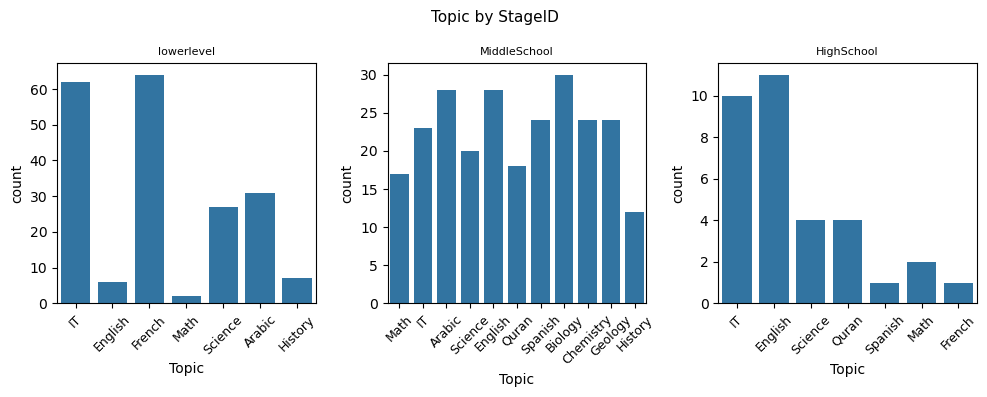

In [6]:
L_stage = df[df.StageID == 'lowerlevel']
M_stage = df[df.StageID == 'MiddleSchool']
H_stage = df[df.StageID == 'HighSchool']

plt.figure(figsize=(10,4))
j = 1

for i in [L_stage, M_stage, H_stage]:
    plt.subplot(1,3, j)
    sns.countplot(x=i['Topic'])
    plt.xticks(rotation=45, fontsize=9)
    plt.title(f'{i.StageID.unique()[0]}', fontsize=8)
    j += 1

plt.suptitle('Topic by StageID', fontsize=11)
plt.tight_layout()
plt.show()

- stageID별 Topic의 개수가 다르다. MiddleSchool은 과목이 다양해서 크게 몇 과목에만 치우치지 않는다.
- French는 MiddleSchool에 없다.
- Arabic은 HighSchool에 없다.
    - 대부분의 학생이 쿠웨이트, 요르단 출신이라 어렸을 때부터 Arabic을 배우고 Quran 과목을 Middle/HighSchool에서 수강하는 것 같다.

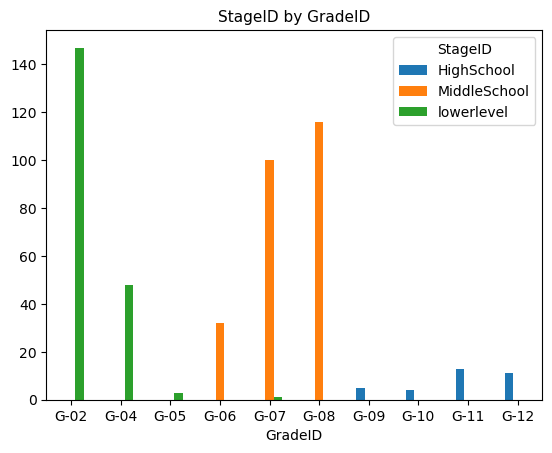

In [8]:
pd.crosstab(columns=df.StageID, index=df.GradeID, values=df.gender, aggfunc='count').plot.bar(rot=0)

plt.title("StageID by GradeID", fontsize=11)
plt.show()

- 같은 GradeID(G-07)가 다른 StageID(MiddleSchool)에도 있다.
- GradeID(G-02)학년 학생이 가장 많다.

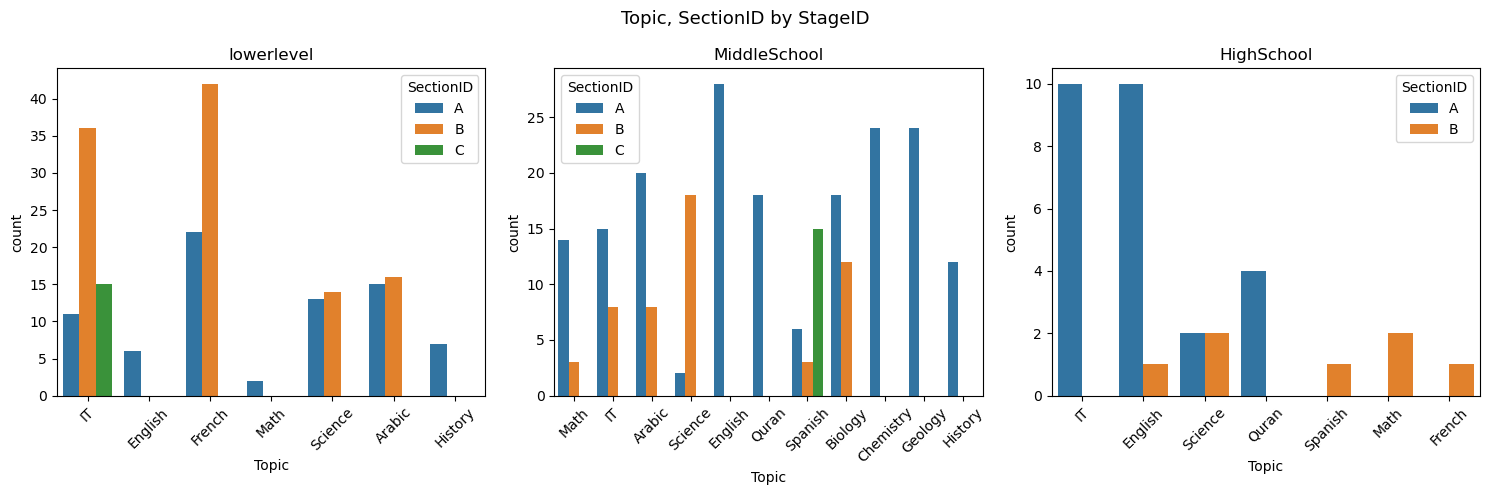

In [10]:
plt.figure(figsize=(15, 5))
j = 1

for i in [L_stage, M_stage, H_stage]:
    plt.subplot(1, 3, j)
    sns.countplot(x=i['Topic'], hue=i['SectionID'])
    plt.xticks(rotation=45)
    plt.title(i.StageID.unique()[0])
    j += 1
    
plt.suptitle('Topic, SectionID by StageID', fontsize=13)
plt.tight_layout()
plt.show()

- section(C)반은 GradeID(G-02, G-08)학년만 있고, Topic(IT와 Spanish)을 수강한다.

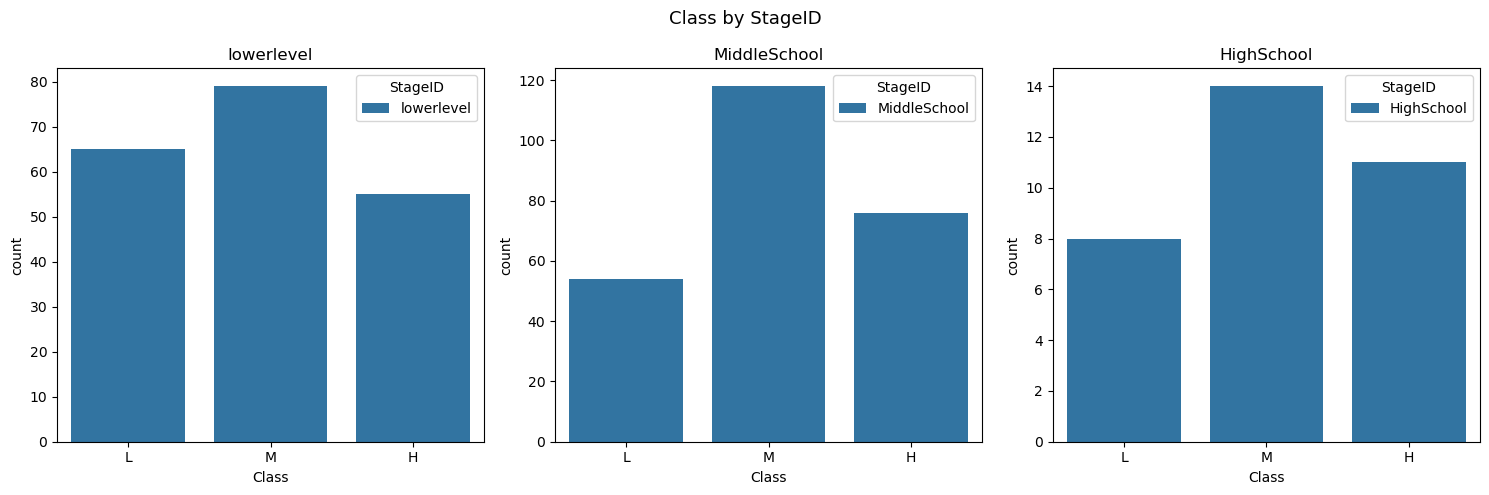

In [12]:
plt.figure(figsize=(15, 5))
j = 1

class_order = ['L', 'M', 'H']

for i in [L_stage, M_stage, H_stage]:
    plt.subplot(1, 3, j)
    sns.countplot(x=i['Class'], hue=i['StageID'], order=class_order)
    plt.xticks()
    plt.title(i.StageID.unique()[0])
    j += 1
    
plt.suptitle('Class by StageID', fontsize=13)
plt.tight_layout()
plt.show()

- Class는 표준정규분포를 따르는것을 보임.

#### 요약
- MiddleSchool과 HighSchool은 과목과 교육 과정에서 차별화된 특징을 가질 수 있으며, 각 GradeID별로 교육과정과 수업 선택이 다를 수 있다.  
- 특정 학년(GradeID)에서는 특정 과목들이 집중적으로 제공되며, 예를 들어 G-02 학년 학생들이 가장 많고, SectionID(C)반은 특정 과목들만 수강하도록 구성되어 있다.
- 과목의 제공 여부(Arabic, French)는 각 학년과 학교의 교육 방향과 학생 수요에 따라 다르게 나타날 수 있다. 

## EDA(학생 참여도)

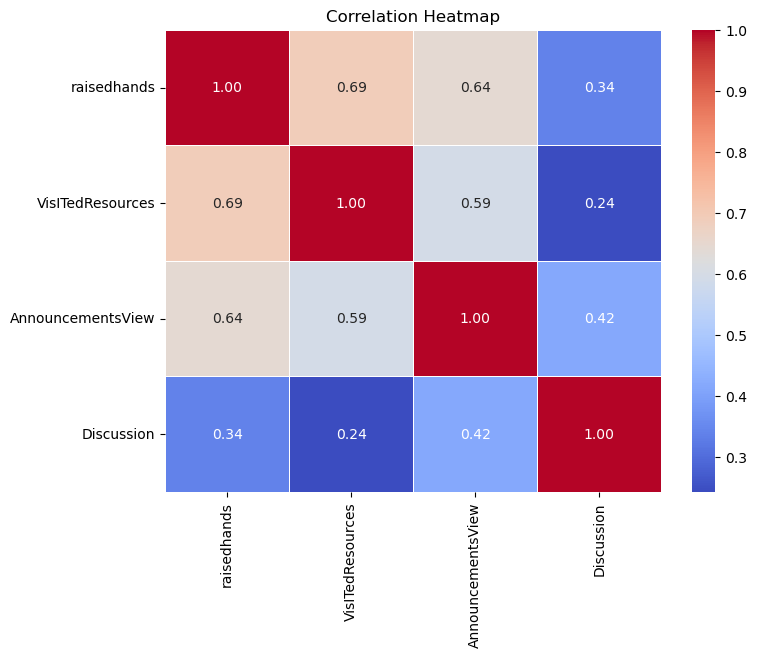

In [16]:
df1 = df[["raisedhands", "VisITedResources", "AnnouncementsView", "Discussion"]]
corr_matrix = df1.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

- raisedhands는 VisITedResources와 AnnouncementsView과 강한 상관관계가 있다.
- VisITedResources는 AnnouncementsView와 뚜렷한 상관관계가 있다.

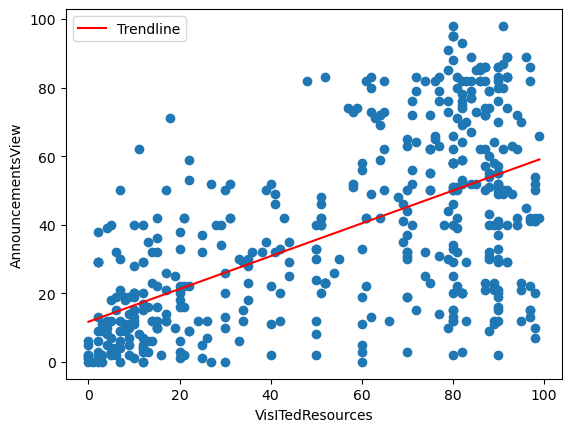

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# 산점도
plt.scatter(df['VisITedResources'], df['AnnouncementsView'])

# 선형 회귀 계산
slope, intercept, r_value, p_value, std_err = linregress(df['VisITedResources'], df['AnnouncementsView'])

# 회귀선을 그리기 위한 x 값 생성
x_values = np.linspace(df['VisITedResources'].min(), df['VisITedResources'].max(), 100)

# 회귀선 계산
y_values = slope * x_values + intercept

# 추세선 그리기
plt.plot(x_values, y_values, color='red', label='Trendline')

# 레이블 추가
plt.xlabel('VisITedResources')
plt.ylabel('AnnouncementsView')
plt.legend()

# 그래프 표시
plt.show()

- 학생이 과정 내용을 방문한 횟수가 증가함에 따라 학생이 과목 공지를 확인한 횟수도 증가함을 알 수 있다.

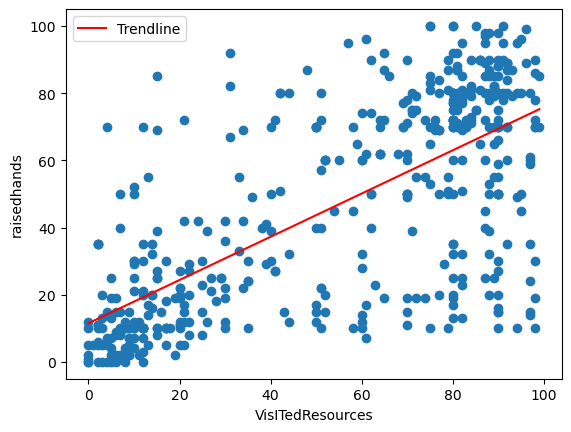

In [20]:
# 산점도
plt.scatter(df['VisITedResources'], df['raisedhands'])

# 선형 회귀 계산
slope, intercept, r_value, p_value, std_err = linregress(df['VisITedResources'], df['raisedhands'])

# 회귀선을 그리기 위한 x 값 생성
x_values = np.linspace(df['VisITedResources'].min(), df['VisITedResources'].max(), 100)

# 회귀선 계산
y_values = slope * x_values + intercept

# 추세선 그리기
plt.plot(x_values, y_values, color='red', label='Trendline')

# 레이블 추가
plt.xlabel('VisITedResources')
plt.ylabel('raisedhands')
plt.legend()

# 그래프 표시
plt.show()

- 학생이 수업 중 손을 든 횟수가 증가함에 따라  학생이 과정 내용을 방문한 횟수도 증가함을 알 수 있다.

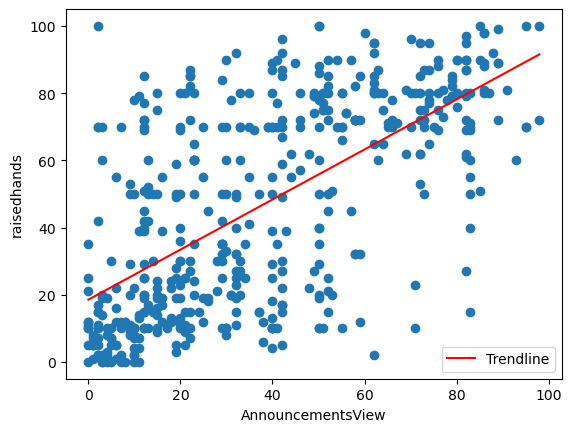

In [22]:
# 산점도
plt.scatter(df['AnnouncementsView'], df['raisedhands'])

# 선형 회귀 계산
slope, intercept, r_value, p_value, std_err = linregress(df['AnnouncementsView'], df['raisedhands'])

# 회귀선을 그리기 위한 x 값 생성
x_values = np.linspace(df['AnnouncementsView'].min(), df['AnnouncementsView'].max(), 100)

# 회귀선 계산
y_values = slope * x_values + intercept

# 추세선 그리기
plt.plot(x_values, y_values, color='red', label='Trendline')

# 레이블 추가
plt.xlabel('AnnouncementsView')
plt.ylabel('raisedhands')
plt.legend()

# 그래프 표시
plt.show()

- 학생이 수업 중 손을 든 횟수가 증가함에 따라 학생이 과목 공지를 확인한 횟수도 증가함을 알 수 있다.

## 예측모델(학업 환경 정보)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
# 범주형 변수 인코딩
label_encoders = {}
columns = ["StageID", "GradeID", "Semester", "Topic"]
for col in columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [27]:
# 데이터 분리
X = df[columns]
y = df["Class"]

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [28]:
# 랜덤 포레스트 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# 예측 수행
y_pred = model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.3750


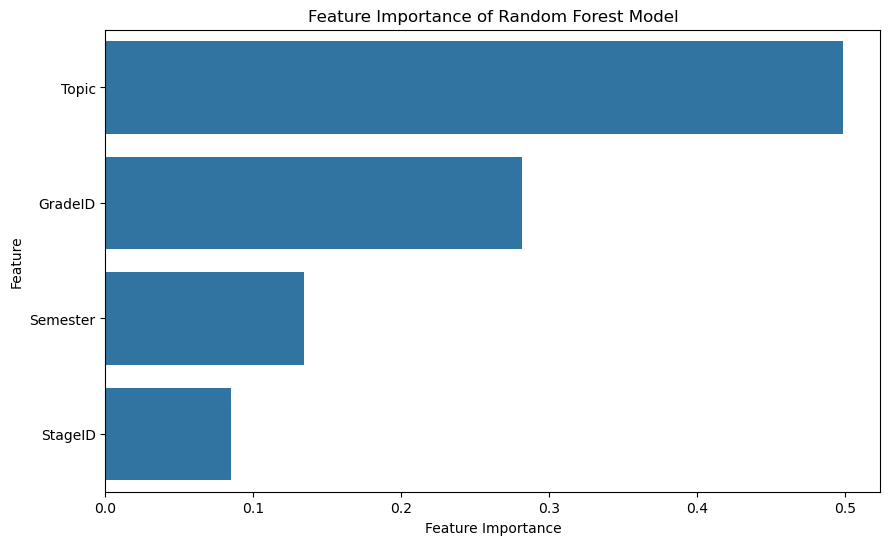

In [29]:
# Feature Importtance 추출
feature_importances = model.feature_importances_
feature_names = X.columns

# 데이터 프레임으로 변환 후 정렬
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# 시각화
plt.figure(figsize=(10,6))
sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance of Random Forest Model")
plt.show()

- StageID, GradeID, SectionID, Topic, Semester는 범주형 데이터이므로 Label Encoding을 수행하였다.
- 범주형 변수들이 많아 랜덤포레스트(Random Forest) 모델을 선택하였다.
- 랜덤포레스트(Random Forest)는 각 특성이 예측에 얼마나 기여했는지 특성 중요도(Feature Importance)를 제공하고 이를 통해 어떤 요소가 학생의 성적 등급(Class)에 영향을 주는지 분석 가능하다.
- 랜덤포레스트(Random Forest)에서 특성 중요도(Feature Importance)를 구하였을 때 수강한 과목(Topic)이 가장 중요도를 가지는것을 보인다.

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Topic + GradeID + Semester 다중 회귀 모델
columns = ['Topic', 'GradeID', 'Semester']

# 범주형 변수 인코딩
label_encoders = {}
X = df[columns].copy()
for col in columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # 인코딩 저장

# Class를 숫자로 변환 (L=0, M=1, H=2)
class_mapping = {'L': 0, 'M': 1, 'H': 2}
y = df['Class'].map(class_mapping)

from sklearn.model_selection import train_test_split

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [32]:
# 선형 회귀 모델 학습
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# 예측 수행
y_pred = reg_model.predict(X_test)

# 성능 평가 (MSE 계산)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.4f}')

Mean Squared Error (MSE): 0.4965


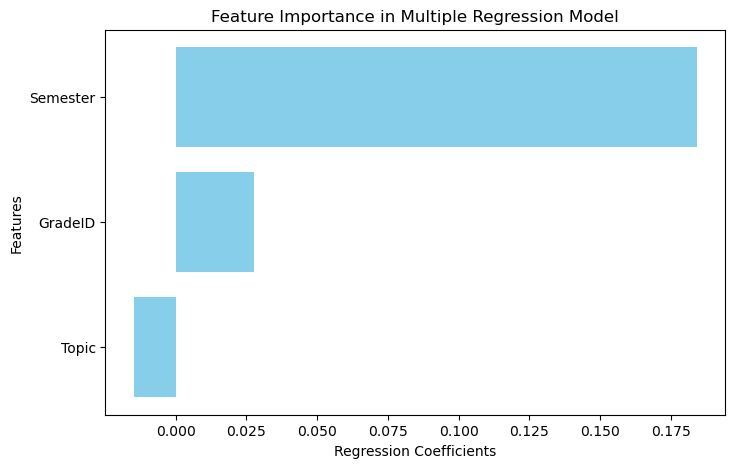

In [33]:
# Feature 중요도 시각화 (회귀 계수)
coefficients = reg_model.coef_
feature_names = X.columns

plt.figure(figsize=(8, 5))
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel("Regression Coefficients")
plt.ylabel("Features")
plt.title("Feature Importance in Multiple Regression Model")
plt.show()

- 하지만 Topic, GradeID, Semester로 다중 회귀 모델을 만들어 보았을때 오히려 Topic이 성적에 미치는 영향이 작고, Semester와 GradeID가 영향력이 큰걸 보아 학생의 학년과 학기에 따라 성적에 큰 영향을 주는것을 보임.

## 새로운 데이터 1 (부모 관련 정보)

In [38]:
df2 = pd.read_csv("student_performance.csv")
df2

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85
5,6,Olivia,Female,95,30,88,1,High,90
6,7,Daniel,Male,70,8,60,0,Low,62
7,8,Sophia,Female,85,17,77,1,Medium,78
8,9,James,Male,82,12,70,2,Low,72
9,10,Isabella,Female,91,22,86,3,High,88


In [40]:
# ParentalSupport를 숫자로 변환 (Low=0, Medium=1, High=2)
support_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df2['ParentalSupport'] = df2['ParentalSupport'].map(support_mapping)

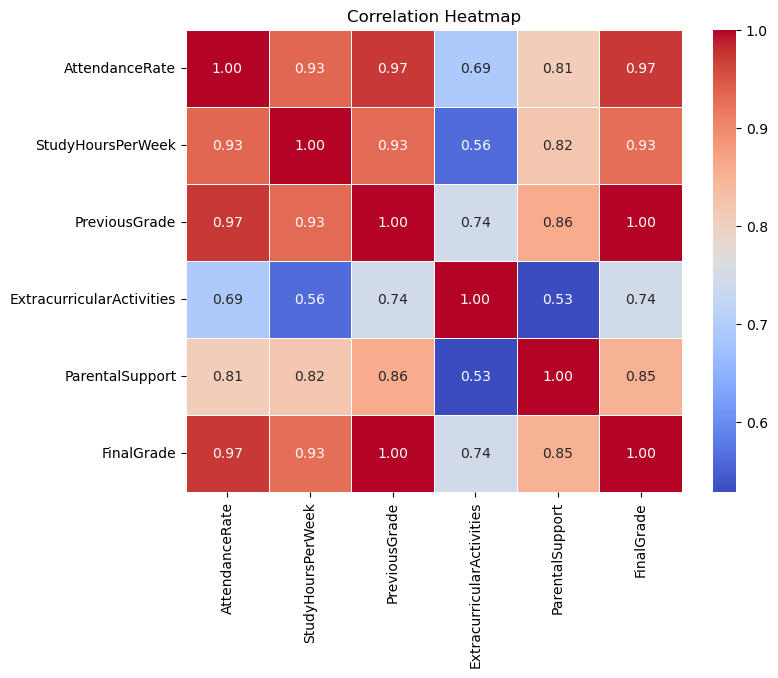

In [42]:
# 상관관계 (히트맵)
df3 = df2[['AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade', 'ExtracurricularActivities', 'ParentalSupport', 'FinalGrade']]
corr_matrix = df3.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

- ParentalSupport(학생의 부모가 제공하는 지원 수준)은 FinalGrade(학생의 최종 성적)과 강한 연관관계를 가지고 있다.

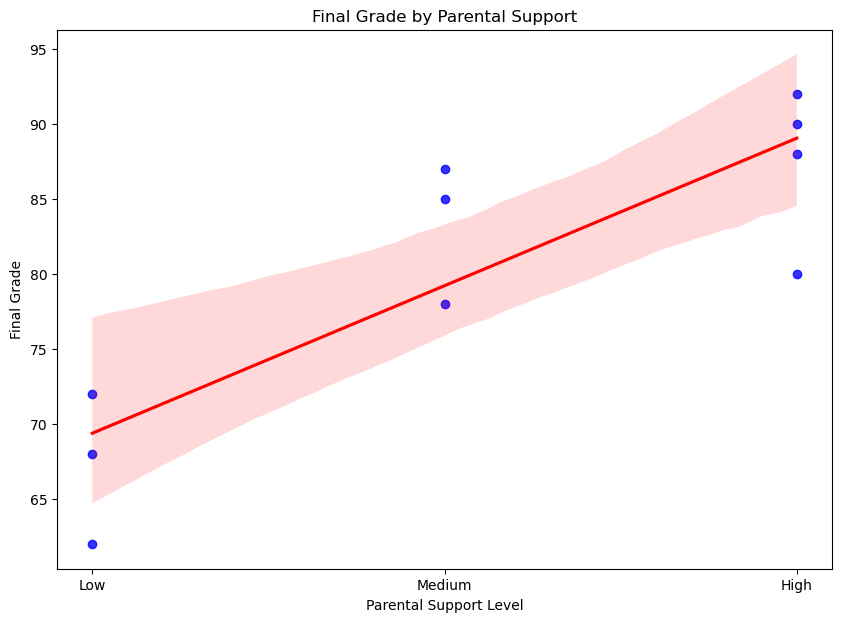

In [45]:
plt.figure(figsize=(10, 7))
sns.regplot(x=df2['ParentalSupport'], y=df2['FinalGrade'], scatter=True, ci=95, color='blue', line_kws={"color": "red"})

# X축 라벨 변경 (0 : Low, 1 : Medium, 2 : High)
plt.xticks(ticks=[0, 1, 2], labels=["Low", "Medium", "High"])
plt.xlabel("Parental Support Level")
plt.ylabel("Final Grade")
plt.title("Final Grade by Parental Support")
plt.show()

- ParentalSupport(학생의 부모가 제공하는 지원 수준)가 높을수록 FinalGrade(학생의 최종 성적)이 높아지는것을 볼 수 있음.

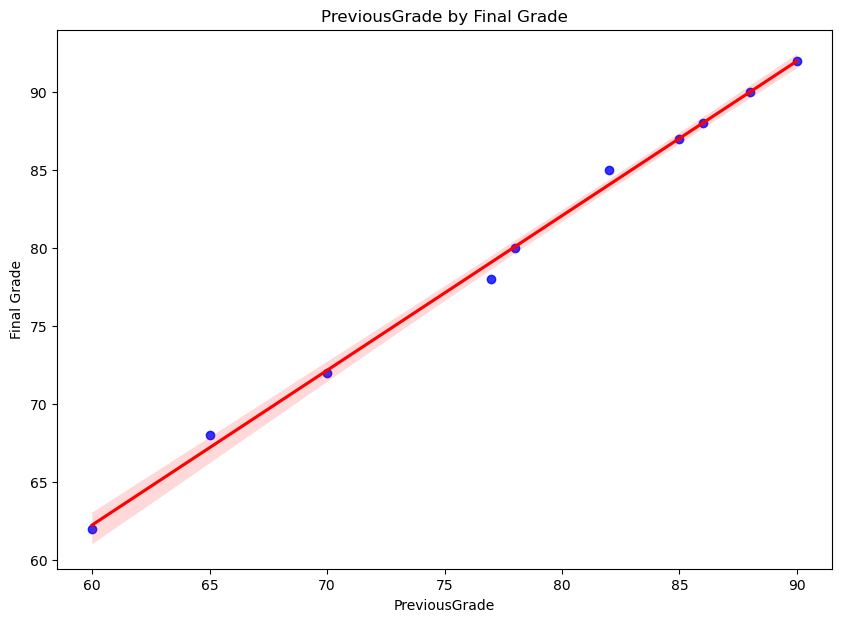

In [48]:
plt.figure(figsize=(10, 7))
sns.regplot(x=df2['PreviousGrade'], y=df2['FinalGrade'], scatter=True, ci=95, color='blue', line_kws={"color": "red"})

plt.xlabel("PreviousGrade")
plt.ylabel("Final Grade")
plt.title("PreviousGrade by Final Grade")
plt.show()

- 학생이 이전 학기에 받은 성적보다 학생의 최종 성적이 높은 추세를 보임.

## 새로운 데이터 2 (학생 참여도)

In [52]:
df4 = pd.read_csv("student_performance2.csv")
df4

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [54]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


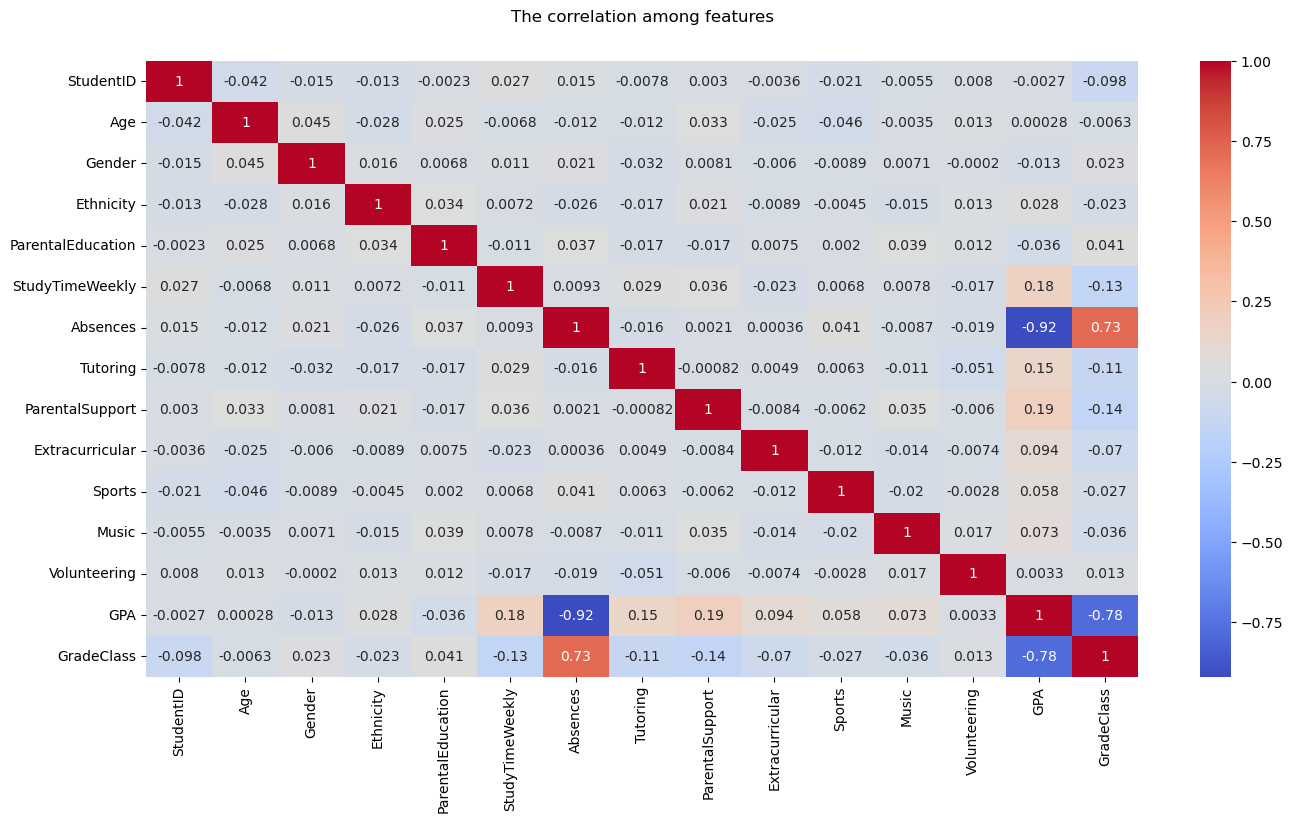

In [56]:
plt.figure(figsize=(16, 8))
sns.heatmap(df4.corr(), annot = True, cmap = "coolwarm")
plt.title('The correlation among features', y= 1.05)
plt.show()

- Absences는 GPA랑 GradeClass에 강한 상관관계를 가지는것을 볼수있다.

In [59]:
# 매핑 딕셔너리 생성
grade_mapping = {0: 4, 1: 3, 2: 2, 3: 1, 4: 0}

# 매핑 적용
df4['GradeClass'] = df4['GradeClass'].map(grade_mapping)

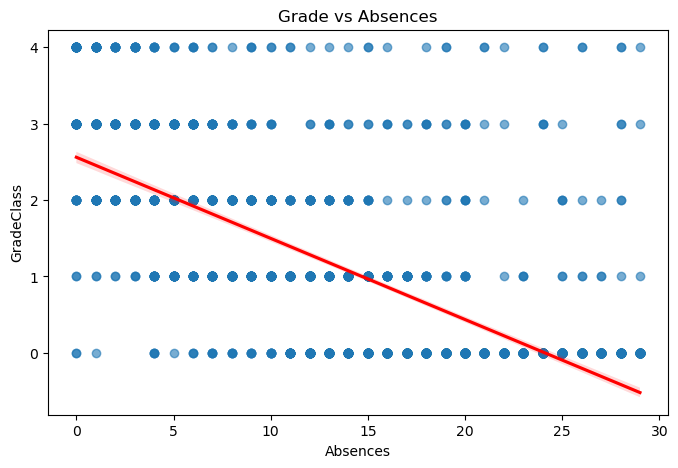

In [61]:
plt.figure(figsize=(8, 5))
sns.regplot(x=df4['Absences'], y=df4['GradeClass'], scatter=True, ci=95, line_kws={"color": "red"}, scatter_kws={"alpha": 0.6})

# 그래프 스타일 설정
plt.xlabel("Absences")
plt.ylabel("GradeClass")
plt.title("Grade vs Absences")
plt.show()

- 결석일수가 많으면 많을수록 성적이 떨어지는것을 볼수있음.

## 가설 : 학기에 따라 수업 참여도 및 성적이 높아질것이다.

In [65]:
melt = pd.melt(df,id_vars='Class',value_vars=['raisedhands','VisITedResources','AnnouncementsView'])

Text(0.5, 1.0, 'High, middle and low level students')

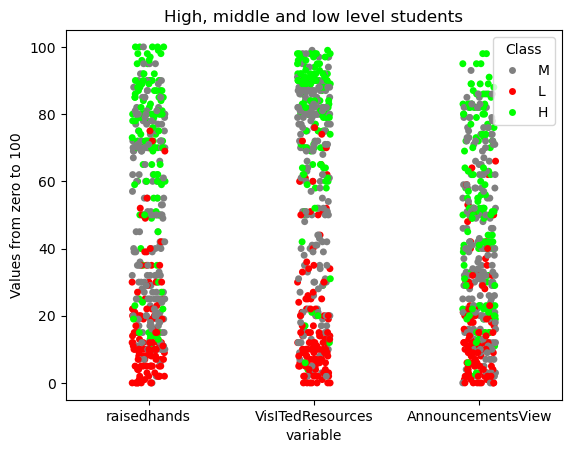

In [67]:
sns.stripplot(x='variable', y='value', hue='Class', data=melt,palette={'H':'lime','M':'grey','L':'red'})
plt.ylabel('Values from zero to 100')
plt.title('High, middle and low level students')

- 성적이 높을수록 손을 든 횟수, 과정 내용을 방문한 횟수, 과목 공지를 확인한 횟수가 높게 분포 되어 있는 것으로 보인다.

<Axes: xlabel='Class', ylabel='Semester'>

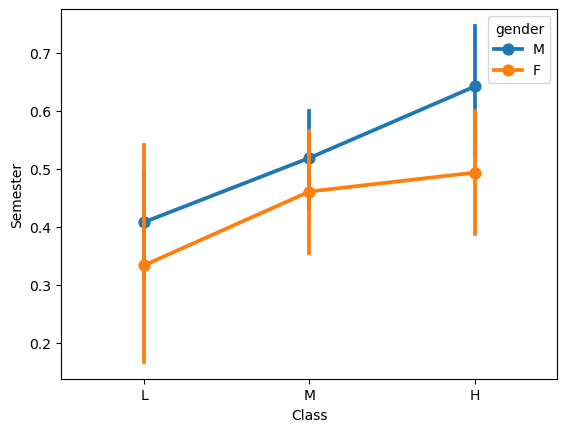

In [87]:
sns.pointplot(x='Class', y='Semester', hue='gender', order=['L','M','H'], data=df)

- 학기에 따라 성적도 높아지는 것을 보인다.

<Axes: xlabel='Semester', ylabel='AnnouncementsView'>

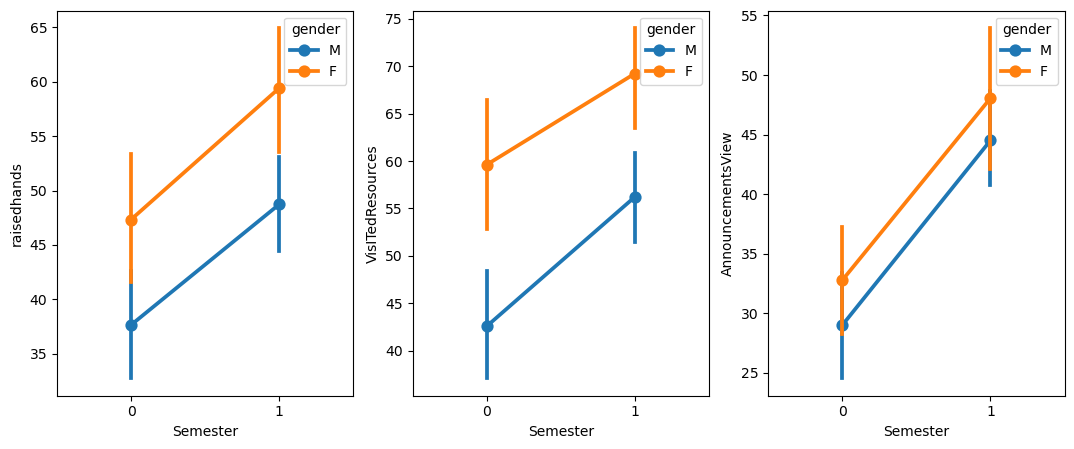

In [94]:
fig, (axis1, axis2, axis3) = plt.subplots(1, 3,figsize=(13,5))
sns.pointplot(x='Semester', y='raisedhands', hue='gender', data=df, ax=axis1)
sns.pointplot(x='Semester', y='VisITedResources', hue='gender', data=df, ax=axis2)
sns.pointplot(x='Semester', y='AnnouncementsView', hue='gender', data=df, ax=axis3)

- 학기에 따라 학생의 손을 든 횟수, 과정 내용을 방문한 횟수, 과목 공지를 확인한 횟수가 높아지는 것을 볼수있다.

<Axes: xlabel='Semester', ylabel='AnnouncementsView'>

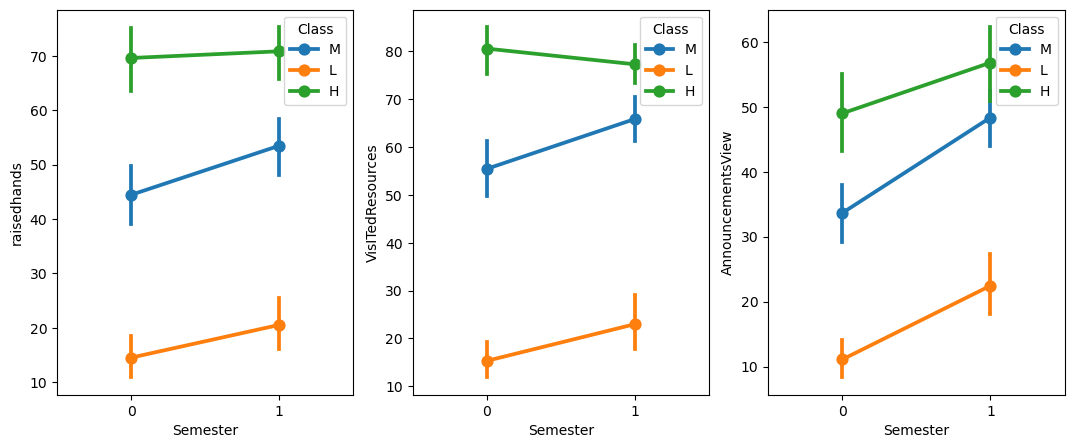

In [70]:
fig, (axis1, axis2, axis3)  = plt.subplots(1, 3,figsize=(13,5))
sns.pointplot(x='Semester', y='raisedhands', hue='Class', data=df, ax=axis1)
sns.pointplot(x='Semester', y='VisITedResources', hue='Class', data=df, ax=axis2)
sns.pointplot(x='Semester', y='AnnouncementsView', hue='Class', data=df, ax=axis3)

- 학기와 학생의 손을 든 횟수, 과정 내용을 방문한 횟수, 과목 공지를 확인한 횟수에 따라 성적도 높아지는 것을 볼 수 있다.